<a href="https://colab.research.google.com/github/vaibhavi128/Pytorch-deep-learning/blob/main/Experiment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Implement simple linear regression operation using neural network.***

In [1]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets
X, y = datasets.make_regression(n_samples=60, n_features=1, noise=1, random_state=42)

In [3]:
X.shape

(60, 1)

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

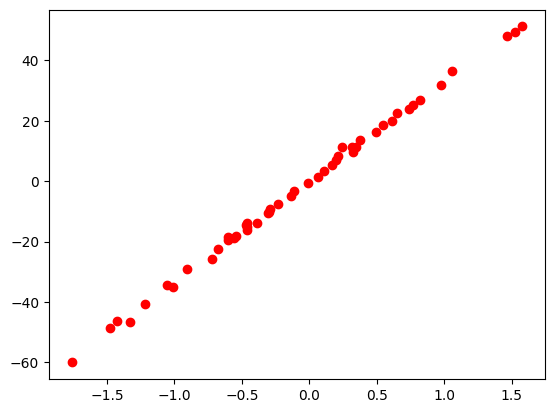

In [5]:
plt.plot(X_train,y_train,'ro')

In [7]:
X_train_tensor =torch.from_numpy(X_train.astype(np.float32))
y_train_tensor = torch.from_numpy(y_train.astype(np.float32))
X_test_tensor =torch.from_numpy(X_test.astype(np.float32))
y_test_tensor = torch.from_numpy(y_test.astype(np.float32))
y_train_tensor = y_train_tensor.reshape(-1,1)
y_test_tensor = y_test_tensor.reshape(-1,1)
X_train_tensor.shape,y_train_tensor.shape

(torch.Size([48, 1]), torch.Size([48, 1]))

In [8]:
class Model(nn.Module):
    def __init__(self, in_features=1, output=1):
        super().__init__()
        self.out = nn.Linear(in_features,output)
    def forward(self,x):
        x= self.out(x)
        return x

[Parameter containing:
tensor([[0.7628]], requires_grad=True), Parameter containing:
tensor([-0.9746], requires_grad=True)]


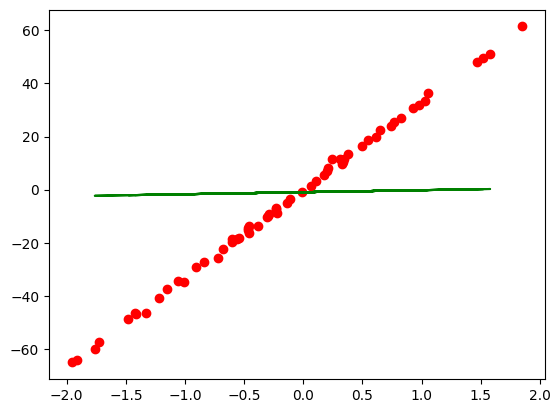

In [9]:
model = Model()
print(list(model.parameters()))
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

plt.plot(X,y,'ro')
predict = model(X_train_tensor).detach().numpy()
plt.plot(X_train_tensor.detach().numpy(),predict,'g')
plt.show()

epoch: 0 Train loss: 657.2284545898438 Test loss: 1686.0108642578125
epoch: 20 Train loss: 397.2386779785156 Test loss: 1007.0355834960938
epoch: 40 Train loss: 241.21197509765625 Test loss: 603.7474975585938
epoch: 60 Train loss: 147.05384826660156 Test loss: 363.0434875488281
epoch: 80 Train loss: 89.9974136352539 Test loss: 218.8168487548828
epoch: 100 Train loss: 55.3188362121582 Test loss: 132.13197326660156
epoch: 120 Train loss: 34.19498062133789 Test loss: 79.90894317626953
epoch: 140 Train loss: 21.3071231842041 Test loss: 48.39360046386719
epoch: 160 Train loss: 13.435088157653809 Test loss: 29.354148864746094
epoch: 180 Train loss: 8.622727394104004 Test loss: 17.845996856689453
epoch: 200 Train loss: 5.67905855178833 Test loss: 10.890849113464355
epoch: 220 Train loss: 3.8776609897613525 Test loss: 6.690637588500977
epoch: 240 Train loss: 2.7749617099761963 Test loss: 4.158097743988037
epoch: 260 Train loss: 2.09979510307312 Test loss: 2.6348154544830322
epoch: 280 Train lo

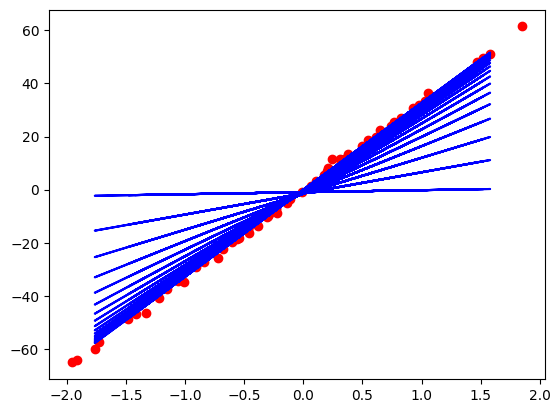

In [10]:
epochs=350
plt.plot(X,y,'ro')
losses = []
test_loss = []
for e in range(epochs):
  #Put model in training mode
  model.train()
  #forward pass
  y_predict_tensor = model(X_train_tensor)
  loss = criterion(y_predict_tensor,y_train_tensor)
  losses.append(loss.detach().numpy())
  #make gradient zero
  optimizer.zero_grad()
  #backward pass
  loss.backward()
  #update parameters
  optimizer.step()
  #Put model in testing mode
  model.eval()
  with torch.inference_mode():
    y_preds = model(X_test_tensor)
    tloss=criterion(y_preds,y_test_tensor)
    test_loss.append(tloss.detach().numpy())
  if e%20 == 0 :
    print(f'epoch: {e} Train loss: {loss.item()} Test loss: {tloss.item()}')
    predict = y_predict_tensor.detach().numpy()
    plt.plot(X_train_tensor.detach().numpy(),predict,'b')
plt.show()

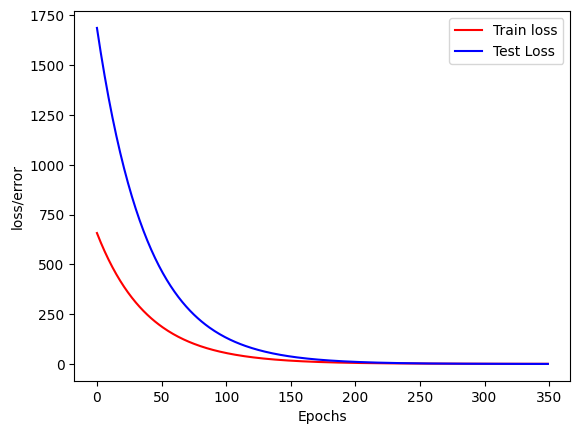

In [11]:
plt.plot(range(epochs),losses,"r",label="Train loss")
plt.plot(range(epochs),test_loss,"b",label="Test Loss")

plt.ylabel("loss/error")
plt.xlabel("Epochs")
plt.legend()